In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [30]:
from wordcloud import WordCloud

In [32]:
df = pd.read_csv("D:/ML2/LAB/Project/Dataset/depression.csv")

In [33]:
df

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1
...,...,...
7726,is that snow,0
7727,moulin rouge mad me cry once again,0
7728,trying to shout but can t find people on the list,0
7729,ughh can t find my red sox hat got ta wear thi...,0


In [34]:
df.isnull()

,clean_text,is_depression
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7726,False,False
7727,False,False
7728,False,False
7729,False,False


In [35]:
df.isnull().sum()

clean_text       0
is_depression    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [37]:
df.value_counts().sum()

7731

In [40]:
df['is_depression'].value_counts()

0    3900
1    3831
Name: is_depression, dtype: int64

# DATA PRE-PROCESSING

In [41]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [42]:
df.columns

Index(['clean_text', 'is_depression'], dtype='object')

In [49]:
# CONVERTING TO LOWER CASE
df["clean_text"] = new_df["clean_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [50]:
# REMOVING NUMERICAL VALUES
df["clean_text"] = new_df["clean_text"].str.replace("\d","")

In [51]:
# REMOVING PUNCTUATION MARKS
df["clean_text"] = new_df["clean_text"].str.replace("[^\w\s]","")

In [52]:
# STOPWORDS
# To eliminate unimportant words, allowing applications to focus on the important words instead.
sw = stopwords.words("english")
df["clean_text"] = new_df["clean_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [53]:
# LEMMATIZATION
# Switches any kind of a word to its base root mode
#new_df["post_text"] = new_df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

In [54]:
# WORD TOKENIZATION
# To split paragraphs and sentences into smaller units that can be more easily assigned meaning
#new_df["tokens"] = new_df["post_text"].apply(lambda x: TextBlob(x).words)

In [55]:
new_df

,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1
...,...,...
7726,snow,0
7727,moulin rouge mad cry,0
7728,trying shout find people list,0
7729,ughh find red sox hat got ta wear creepy nick ...,0


# EDA

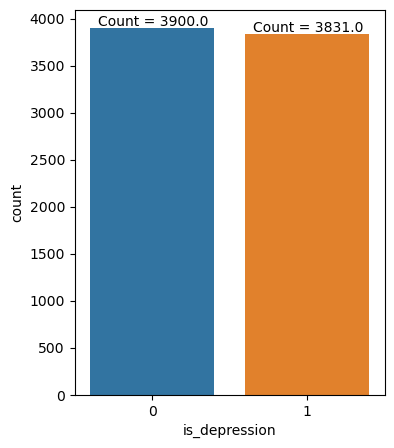

In [56]:
plt.figure(figsize=(4,5))
plot1 = sns.countplot(df['is_depression'], order = [0,1])
for i in plot1.patches:
        plot1.annotate('Count = {:.1f}'.format(i.get_height()), (i.get_x()+0.05, i.get_height()+30))

In [57]:

wo = WordNetLemmatizer()
corpus=[]
for i in range(0,len(new_df)):
    clean_txt = re.sub('[^a-zA-Z]',' ',df['clean_text'][i])
    clean_txt = clean_txt.lower()
    clean_txt = clean_txt.split()
    clean_txt = [wo.lemmatize(word) for word in clean_txt ]
    clean_txt = ' '.join(clean_txt)
    corpus.append(clean_txt)

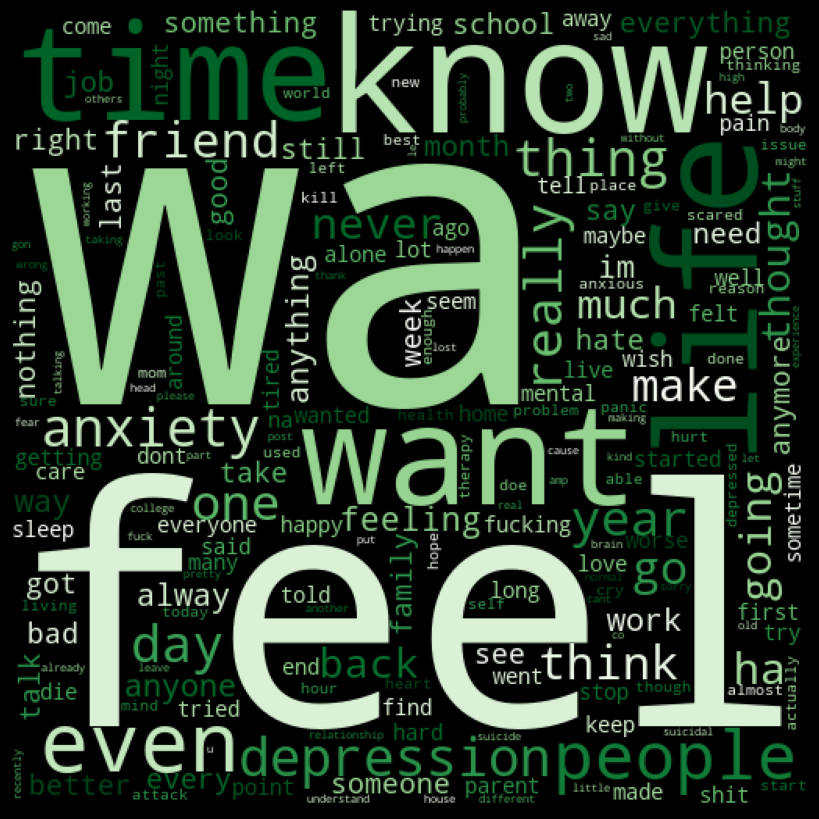

In [58]:
negative_words = ' '.join(list(df[df['is_depression'] == 1]['clean_text']))
neg_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Greens").generate(negative_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(neg_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

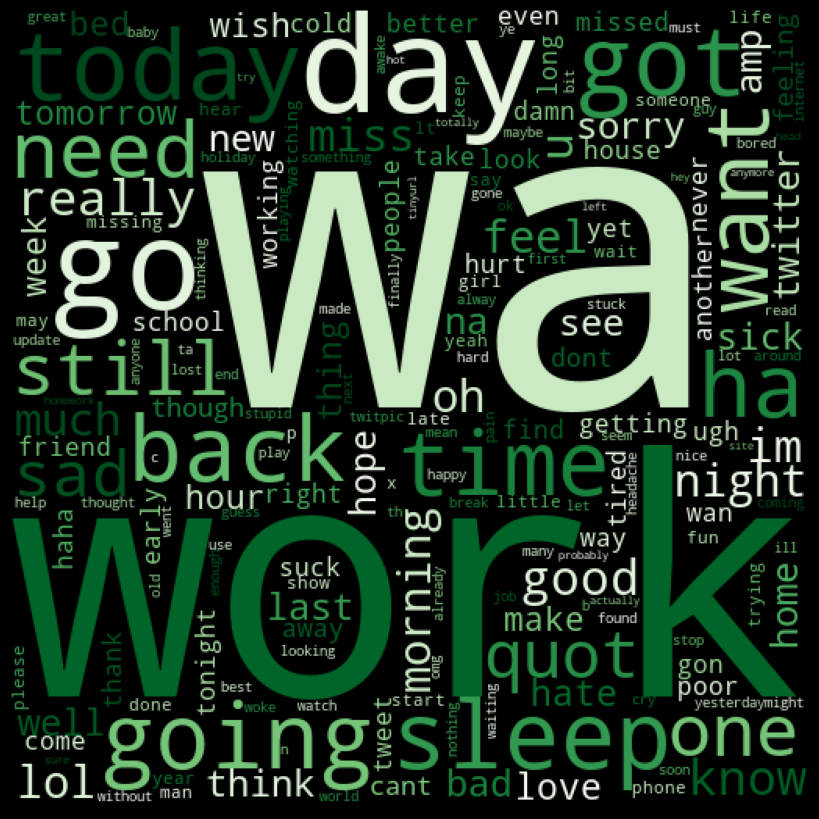

In [59]:
positive_words = ' '.join(list(df[df['is_depression'] == 0]['clean_text']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Greens").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

# TOKENIZATION

In [60]:
X = df['clean_text']

In [61]:
max_words = 10000
tokenizer= Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

In [62]:
word_vector = tokenizer.texts_to_sequences(X)

In [63]:
word_index = tokenizer.word_index

In [64]:
vocab_size = len(word_index)
vocab_size   # num of unique tokens


18620

In [65]:
max_seq_length = 140
input_tensor = pad_sequences(word_vector, maxlen= max_seq_length)

In [66]:
input_tensor.shape

(7731, 140)

# MODELS

## LOGISTIC REGRESSION

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,df['is_depression'],test_size=0.25,random_state=42)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer( ngram_range=(1,3), stop_words='english',max_features=15000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [69]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
x_resample, y_resample = SMOTE().fit_resample(X_train_vect, y_train)
x_test_resample, y_test_resample = SMOTE().fit_resample(X_test_vect, y_test)
# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(5824, 15000)
(5824,)


In [70]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(x_resample,y_resample)

LogisticRegression()

In [71]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_1.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       988
           1       0.96      0.93      0.94       988

    accuracy                           0.94      1976
   macro avg       0.94      0.94      0.94      1976
weighted avg       0.94      0.94      0.94      1976



# NAIVE BAYES MODEL

In [83]:
from sklearn.naive_bayes import MultinomialNB
model_2 = MultinomialNB()
model_2.fit(x_resample,y_resample)

MultinomialNB()

In [84]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model_2.predict(x_test_resample)
accuracy_score(y_test_resample,y_pred)
print(classification_report(y_test_resample,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       988
           1       0.82      0.98      0.89       988

    accuracy                           0.88      1976
   macro avg       0.90      0.88      0.88      1976
weighted avg       0.90      0.88      0.88      1976



In [85]:
def preprocess(data):
    #preprocess
    a = re.sub('[^a-zA-Z]',' ',data)
    a = a.lower()
    a = a.split()
    a = [wo.lemmatize(word) for word in a ]
    a = ' '.join(a)  
    return a

In [87]:
import re
strr = input('Enter Your Message: ')
print("-------------------------------")
examples = strr

a = preprocess(examples)

example_counts = vectorizer.transform([a])
prediction =model_1.predict(example_counts)
prediction[0]

if prediction[0]==0:
    print('Positive')
elif prediction[0]==1:
    print('Depressive')

Enter Your Message: thank you guys for coming i am so happy that u guys are here
-------------------------------
Positive


## Comparing Logistic regression and naive bayes , Logistic regression gives good prediction